# Initialize things

In [187]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [188]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [189]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



# sentences and grammars: chunking


In [289]:
# Some possible grammars to create parse tree
# grammar=" " #empty grammar
# grammar = "NP: {<JJ><NN>}"
# grammar = "NP: {<DT>?<JJ>*<NN>}"

grammar = """
    NP: {<DT>?<JJ>*<NN>}                      # Noun Phrase
    VP: {<VB.*><NP|PP>+}                      # Verb Phrase
    PP: {<IN><NP>}                            # Prepositional Phrase
    ADJP: {<RB>*<JJ>}                         # Adjective Phrase
    CS: {<NP><VP><CC><NP><VP>}                # Compound Sentence
    NER: {<NNP>+}                             # Named Entity Recognition
"""

parser = nltk.RegexpParser(grammar)

In [290]:
# Menu of sentences to be tagged #
#sentence="See Spot run."
#sentence="The quick brown fox jumped over the lazy dog."
 #sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
# sentence='They can fish.'
# sentence='Flying planes can be dangerous'
sentence = "The chicken is ready to eat"
print(sentence)

The chicken is ready to eat


In [291]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['The', 'chicken', 'is', 'ready', 'to', 'eat']
POS tags are [('The', 'DT'), ('chicken', 'NN'), ('is', 'VBZ'), ('ready', 'JJ'), ('to', 'TO'), ('eat', 'VB')]


In [292]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S (NP The/DT chicken/NN) is/VBZ (ADJP ready/JJ) to/TO eat/VB)


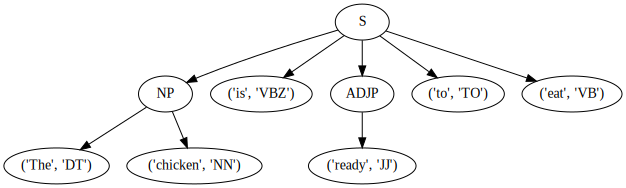

In [293]:
dot_source = to_graphviz(tree)
display(dot_source)

# Context Free Grammars

In [309]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N
VP -> V Adj Inf | VP Inf
Det -> "The"
N -> "chicken"
VP -> V Adj
V -> "is"
Adj -> "ready"
Inf -> "to" V
V -> "eat"
""")

In [310]:
groucho_grammar

<Grammar with 11 productions>

In [311]:
type(groucho_grammar)

nltk.grammar.CFG

In [312]:
groucho_grammar.start()

S

In [313]:
groucho_grammar.productions()

[S -> NP VP,
 NP -> Det N,
 VP -> V Adj Inf,
 VP -> VP Inf,
 Det -> 'The',
 N -> 'chicken',
 VP -> V Adj,
 V -> 'is',
 Adj -> 'ready',
 Inf -> 'to' V,
 V -> 'eat']

In [314]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N]

In [315]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N]

In [316]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [317]:
pp[0].lhs()

NP

In [318]:
pp[0].rhs()

(Det, N)

In [319]:
sent = ['The', 'chicken', 'is', 'ready', 'to', 'eat']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [320]:
print(trees[0])

(S
  (NP (Det The) (N chicken))
  (VP (VP (V is) (Adj ready)) (Inf to (V eat))))


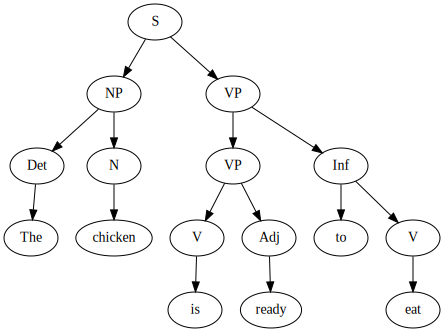

In [321]:
dot_source = to_graphviz(trees[0])
display(dot_source)

In [322]:
print(trees[1])

(S
  (NP (Det The) (N chicken))
  (VP (V is) (Adj ready) (Inf to (V eat))))


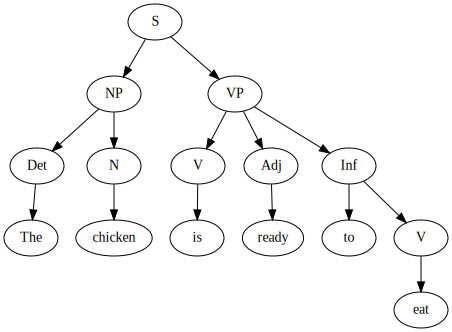

In [323]:
dot_source = to_graphviz(trees[1])
display(dot_source)